This notebook shows how to predict the revenue of a hypothetical F2P game. There's also an Excel equivalent, and students can choose which tool to use. 

Burn per employee 4650.0EUR/month, total company burn 18600.0EUR/month
Day 5 retention 0.5904900000000001, monthly retention 0.04239115827521624


Text(0, 0.5, 'Players')

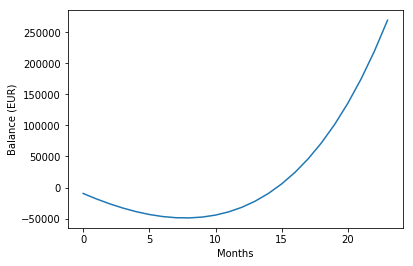

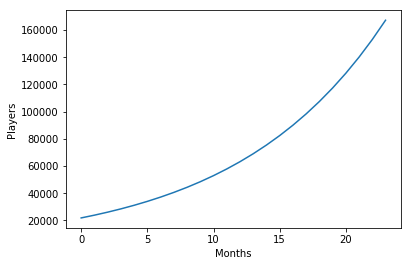

In [13]:
#Basic imports
import numpy as np
import matplotlib.pyplot as pp

#Helper variable
daysPerMonth=30

#Game parameters (you should guess these or measure during soft launch)
userAcquisitionCost=1   #how many EUR to spend in advertising for each new player
dailyChurn=0.1           # of players churning on average, every day
dailyIAPperUser=0.05    #how many EUR an average player spends per day
initialMarketingBudget=10000
launchViralInstalls=10000     #how many players you get, e.g, with your launch trailer
viralSharesPerUserPerMonth=0.01   #how many shares, on average  
installsPerViralShare=0.01        #share conversion rate

#Company parameters
employees=4
salaryPerEmployee=2000
auxiliaryCost=1.55  #salary multiplier for mandatory employer costs
overhead=1.5 #multiplier per employee for rent etc
revenuePercentageInvestedInUA=70  

#Compute and print some metrics
burnPerEmployeePerMonth=salaryPerEmployee*auxiliaryCost*overhead
totalBurnPerMonth=burnPerEmployeePerMonth*employees

day1retention=1.0-dailyChurn        #portion of users retained per day
day5retention=np.power(day1retention,5)
monthlyRetention=np.power(day1retention,daysPerMonth)
print("Burn per employee {}EUR/month, total company burn {}EUR/month".format(burnPerEmployeePerMonth,totalBurnPerMonth))
print("Day 5 retention {}, monthly retention {}".format(day5retention,monthlyRetention))

#Lists to hold the data we want to plot
balanceData=[]
MAUdata=[]

#Initialize simulation. MAU=Monthly Active Users
cumulativeRevenue=0
cumulativeBurn=0
MAU=launchViralInstalls+initialMarketingBudget/userAcquisitionCost  #excel cell C22


#simulate for 2 years
for month in range(24):
    #simulate how the player base evolves
    revenue=MAU*dailyIAPperUser*daysPerMonth                                   
    UAspend=revenue*revenuePercentageInvestedInUA/100                   
    newUsers=UAspend/userAcquisitionCost + MAU * viralSharesPerUserPerMonth * installsPerViralShare                       
    MAU=MAU*monthlyRetention+newUsers

    #keep track of cumulative revenue and burn
    cumulativeRevenue=cumulativeRevenue+revenue                         
    cumulativeBurn=cumulativeBurn+totalBurnPerMonth+UAspend             
    balance=cumulativeRevenue-cumulativeBurn                            

    #store for plotting
    balanceData.append(balance)
    MAUdata.append(MAU)

pp.plot(balanceData)
pp.xlabel("Months")
pp.ylabel("Balance (EUR)")

#new figure
pp.figure()
pp.plot(MAUdata)
pp.xlabel("Months")
pp.ylabel("Players")
